# One Figure Project #02

## About the project

### Author

#### Emanuel Arnaud Neves

Graduating in Statistics at Universidade Federal do Rio Grande do Norte (UFRN). Technical in Computing by the Instituto Federal de Educação, Ciência e Tecnologia do Rio Grande do Norte (IFRN). Student at Programa Talento Metrópole no IMD/UFRN. Student in Programa de Educação Tutorial (PET) - Statistics by the UFRN.

### Activity

This activity was solicited to the course of Data Science I at the Instituto Metrópole Digital, part of the Universidade Federal do Rio Grande do Norte, in Natal, Brazil, with the purpose of practicing the initial knowledge about Data Science in a recent application, stimulating creativity and creating a professional portfolio.

#### Objective

Observe trends in the reviews of aplications in the digital distribution service [Google Play Store](https://play.google.com/store). For that purpose, the dataset [Google Play Store Apps](https://www.kaggle.com/lava18/google-play-store-apps) will be used.

## Methods

We are going to work in this project with [Python](https://www.python.org) using [Google Colab](https://colab.research.google.com). With data manipulation and visualization, we can hypothesize trends for the dataset.

## Solving

### Setting the environment

The packages used in this project are:

*   **google.colab**: files manipulation in Google Colab;
*   **Kaggle**: import the dataset from the Kaggle website;
*   **pandas**: dataset manipulations;
*   **NumPy**: deal with mathematical operations;
*   **Pyplot**: create graphics and tables.



Here we will set up the kaggle package.

In [2]:
!pip install kaggle

In [3]:
# Upload the credential file for the kaggle API
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"emanuelarnaud","key":"023efd261b8f0cad40cb8dd655d10231"}'}

In [4]:
# Making sure the kaggle.json file uploaded is in the right location for the package
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [26]:
!pip install colour

Import the packages.

In [27]:
import kaggle
import pandas as pd
import numpy as np
from colour import Color

import matplotlib.patheffects as PathEffects
import matplotlib.lines as mlines
from matplotlib import pyplot as plt

In [6]:
plt.style.use("fivethirtyeight")  # define the style used by plt in this project

### Obtaining the data

Through the Kaggle API, we can download the dataset. 

In [7]:
# Connect with the API
kaggle.api.authenticate()

# Download the data
kaggle.api.dataset_download_files("lava18/google-play-store-apps", path="./dataset/", unzip=True)

Our main dataset contains information about apps available at the Google Play Store.

In [8]:
data = pd.read_csv("./dataset/googleplaystore.csv")

data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


There is also a secondary dataset with informations about the reviews for the apps.

In [9]:
reviews = pd.read_csv("./dataset/googleplaystore_user_reviews.csv")

reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


### Filtering the reviews

The reviews dataset contains a lot of null observations. Since we will work with numeric data and can't identify what is the value of the missing data, it's better to completely drop the observation.

In [10]:
# Drop missing data
reviews.dropna(inplace=True)

reviews.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
5,10 Best Foods for You,Best way,Positive,1.00,0.300000


The column Translated Review won't be used in this project, so we can drop it. Also, the names of the column can be optmized.

In [11]:
# Drop the column
reviews.drop("Translated_Review", axis=1, inplace=True)

# Rename the rest
reviews.columns = ["App", "Sentiment", "Polarity", "Subjectivity"]

reviews.head()

,App,Sentiment,Polarity,Subjectivity
0,10 Best Foods for You,Positive,1.00,0.533333
1,10 Best Foods for You,Positive,0.25,0.288462
3,10 Best Foods for You,Positive,0.40,0.875000
4,10 Best Foods for You,Positive,1.00,0.300000
5,10 Best Foods for You,Positive,1.00,0.300000


### Transforming

In [12]:
# Obtain the values of Sentiment without repeating
reviews.Sentiment.unique()

array(['Positive', 'Neutral', 'Negative'], dtype=object)

As we can see above, the Sentiment column assumes three values: negative, neutral and positive. Knowing this, we can apply a Likert scale to evaluate this information as numeric values.

For this project, the Likert scale will be: -1 for negative, 0 for neutral and 1 for positive. This way, when calculating the mean we obtain a number between -1 and 1 where higher values implies more positive reviews, lower values more negative reviews and closer to zero neutrals.

In [13]:
# Create the Likert scale
likert = {
    "Negative": -1,
    "Neutral": 0,
    "Positive": 1
}

# Mutate the Sentiment column to match the value for the Likert scale
reviews.Sentiment = reviews.Sentiment.apply(lambda x: likert[x]).copy()
reviews.head()

,App,Sentiment,Polarity,Subjectivity
0,10 Best Foods for You,1,1.00,0.533333
1,10 Best Foods for You,1,0.25,0.288462
3,10 Best Foods for You,1,0.40,0.875000
4,10 Best Foods for You,1,1.00,0.300000
5,10 Best Foods for You,1,1.00,0.300000


Now, we can calculate the mean for each app.

In [14]:
# Here, we obtain the mean for each app by grouping the data
reviews_mean = reviews.groupby("App").mean().copy()

reviews_mean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 865 entries, 10 Best Foods for You to Housing-Real Estate & Property
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sentiment     865 non-null    float64
 1   Polarity      865 non-null    float64
 2   Subjectivity  865 non-null    float64
dtypes: float64(3)
memory usage: 27.0+ KB


### Combining the datasets

The function merge will do almost entirely the work needed. The common column is the app name, which is the index of reviews_mean. As the index kept the name "App", the function can still acess it. The default "inner" method will keep only the observations with values in both datasets.

In [15]:
complete_data = pd.merge(left=data, right=reviews_mean, on="App").copy()

complete_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1229 entries, 0 to 1228
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             1229 non-null   object 
 1   Category        1229 non-null   object 
 2   Rating          1228 non-null   float64
 3   Reviews         1229 non-null   object 
 4   Size            1229 non-null   object 
 5   Installs        1229 non-null   object 
 6   Type            1229 non-null   object 
 7   Price           1229 non-null   object 
 8   Content Rating  1229 non-null   object 
 9   Genres          1229 non-null   object 
 10  Last Updated    1229 non-null   object 
 11  Current Ver     1229 non-null   object 
 12  Android Ver     1229 non-null   object 
 13  Sentiment       1229 non-null   float64
 14  Polarity        1229 non-null   float64
 15  Subjectivity    1229 non-null   float64
dtypes: float64(4), object(12)
memory usage: 163.2+ KB


As we can see above, the resulting dataset have 1229 observations in comparison with the 865 observations of reviews_mean. This mean that for some reason, there are apps in our dataset with multiple appearances. Dropping duplicates will ensure there are only one observation for each app.

In [16]:
# Drop duplicates
complete_data.drop_duplicates("App", inplace=True)

# Reset the index since now we have a different number of observations
complete_data = complete_data.reset_index().drop("index", axis=1).copy()

complete_data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Sentiment,Polarity,Subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,0.272727,0.152652,0.641540
1,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up,0.600000,0.268483,0.523447
2,FlipaClip - Cartoon animation,ART_AND_DESIGN,4.3,194216,39M,"5,000,000+",Free,0,Everyone,Art & Design,"August 3, 2018",2.2.5,4.0.3 and up,1.000000,0.412649,0.679226
3,Boys Photo Editor - Six Pack & Men's Suit,ART_AND_DESIGN,4.1,654,12M,"100,000+",Free,0,Everyone,Art & Design,"March 20, 2018",1.1,4.0.3 and up,0.473684,0.283509,0.479298
4,Colorfit - Drawing & Coloring,ART_AND_DESIGN,4.7,20260,25M,"500,000+",Free,0,Everyone,Art & Design;Creativity,"October 11, 2017",1.0.8,4.0.3 and up,0.552632,0.171836,0.572762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,"AD - Nieuws, Sport, Regio & Entertainment",NEWS_AND_MAGAZINES,3.7,10369,Varies with device,"1,000,000+",Free,0,Everyone,News & Magazines,"July 28, 2018",Varies with device,Varies with device,0.526316,0.161824,0.465806
812,AppLock,TOOLS,4.4,4931562,Varies with device,"100,000,000+",Free,0,Everyone,Tools,"June 11, 2018",Varies with device,Varies with device,-0.076923,0.016233,0.499941
813,Diary with lock password,LIFESTYLE,4.3,179139,9.7M,"5,000,000+",Free,0,Everyone,Lifestyle,"November 1, 2017",3.5.3,4.0.3 and up,0.596154,0.292267,0.509656
814,Avakin Life - 3D virtual world,FAMILY,4.4,1275373,91M,"10,000,000+",Free,0,Teen,Role Playing,"July 3, 2018",1.021.10,4.1 and up,0.521739,0.080859,0.505326


### Filtering again

Here, we will only select the columns needed and change the value at Installs column to numeric.

In [17]:
# Select columns that will be used
columns = [0, 1, 2, 3, 5, 6, 8, 9, 13, 14, 15]
complete_data = complete_data.iloc[:,columns].copy()

# Remove the + and the , at the end of each observation of Installs then convert to int
complete_data.Installs = [int(obs.replace("+", "").replace(",", "")) for obs in complete_data.Installs]
complete_data.head()

,App,Category,Rating,Reviews,Installs,Type,Content Rating,Genres,Sentiment,Polarity,Subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,967,500000,Free,Everyone,Art & Design;Pretend Play,0.272727,0.152652,0.641540
1,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,1000000,Free,Everyone,Art & Design,0.600000,0.268483,0.523447
2,FlipaClip - Cartoon animation,ART_AND_DESIGN,4.3,194216,5000000,Free,Everyone,Art & Design,1.000000,0.412649,0.679226
3,Boys Photo Editor - Six Pack & Men's Suit,ART_AND_DESIGN,4.1,654,100000,Free,Everyone,Art & Design,0.473684,0.283509,0.479298
4,Colorfit - Drawing & Coloring,ART_AND_DESIGN,4.7,20260,500000,Free,Everyone,Art & Design;Creativity,0.552632,0.171836,0.572762


### Analyzing

First of all, let's establish some initial hypothesis. Those can be things that seems logical before looking into the data or a initial guess.

1.   The sentiment influences the final rating of the app;
2.   Paid content will have better rating;
3.   Popular categories have more positive sentiment.



#### Sentiment and Rating

First, let's check how our data is now. For that, we want to see the histograms for Sentiment and for Rating. If our hypothesis is true, if there are a lot of high values for sentiment, there will be a lot of high values for rating also.

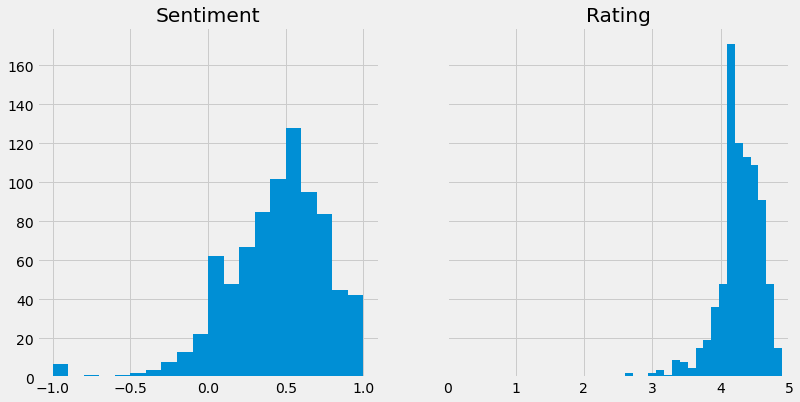

In [54]:
# Create the plot for the histograms
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6), sharey=True)

# Create the histograms
ax[0].hist(complete_data.Sentiment, bins=20)
ax[1].hist(complete_data.Rating, bins=20)
ax[1].set_xlim(0, 5)

# Add titles
ax[0].set_title("Sentiment")
ax[1].set_title("Rating")

plt.show()

Looking at the histograms, we can see a positive trend for both columns. In the Sentiment aspect, the majority of the values are above neutral (0), at around 0,5 for a range of -1 to 1. But for the Rating column, this trend looks way more significant, with a lot of the values being around 4 and 5 for a range of 0 to 5.

In [51]:
sentiment_median = np.median(complete_data.Sentiment)
rating_median = np.median(complete_data.Rating)

print("\tSentiment median: {}\n\tRating median: {}".format(sentiment_median, rating_median))

	Sentiment median: 0.47987117552334946
	Rating median: 4.3


The median, as seen above, can help to visualize it.

As a second resource, we can plot a line graphic of Sentiment by Rating and see the behavior of the line. If the sentiment influences the rating, we could expect a close to straight line moving upwards.

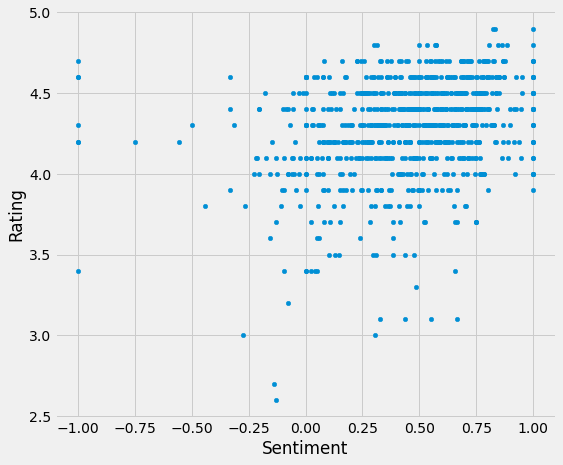

In [60]:
complete_data.plot("Sentiment", "Rating", kind="scatter", figsize=(8, 7))

plt.show()

#### Paid content and Rating

First, let's separate the content types (free and paid).

In [21]:
# Separate by Type
free = complete_data.loc[complete_data.Type == "Free"].copy()
paid = complete_data.loc[complete_data.Type == "Paid"].copy()

paid

,App,Category,Rating,Reviews,Installs,Type,Content Rating,Genres,Sentiment,Polarity,Subjectivity
369,Farming Simulator 18,GAME,4.5,18125,100000,Paid,Everyone,Simulation;Education,0.282051,0.064467,0.493330
370,Call of Duty:Black Ops Zombies,GAME,4.2,13004,100000,Paid,Teen,Action,-1.000000,-0.162120,0.442716
438,Dr. Panda & Toto's Treehouse,FAMILY,4.4,3396,50000,Paid,Everyone,Casual;Pretend Play,0.611111,0.180237,0.532672
445,Essential Anatomy 3,MEDICAL,4.1,1533,50000,Paid,Mature 17+,Medical,0.750000,0.225516,0.522328
446,Diabetes & Diet Tracker,MEDICAL,4.6,395,1000,Paid,Everyone,Medical,0.837838,0.363627,0.568469
565,Golfshot Plus: Golf GPS,SPORTS,4.1,3387,50000,Paid,Everyone,Sports,0.675000,0.386179,0.475312
680,Beautiful Widgets Pro,PERSONALIZATION,4.2,97890,1000000,Paid,Everyone,Personalization,0.675676,0.179418,0.501691
682,HD Widgets,PERSONALIZATION,4.3,58617,1000000,Paid,Everyone,Personalization,0.483871,0.181818,0.513802
694,BIG Launcher,PERSONALIZATION,4.3,881,10000,Paid,Everyone,Personalization,0.525000,0.184987,0.410125


Now we can get the mean for each category.

In [55]:
# Obtain the means
free_mean = free.Rating.mean()
paid_mean = paid.Rating.mean()

print("\tFree content mean: {}\n\tPaid content mean: {}".format(free_mean, paid_mean))

	Free content mean: 4.282403965303592
	Paid content mean: 4.3


As we can see, the mean for paid content is just slightly above the mean for free content. But the difference do not appear to be enough to support our hypothesis. Also, there are only 9 paid apps, what may mislead the information due to low number of observations.

#### Popular categories and Sentiment

In our dataset, we have the column Installs, containing the number of times that app was installedby grouping it and ordering, we obtain the rank of popularity for the categories.

In [23]:
sentiment_by_installs = complete_data.groupby("Category").agg({"Installs": "sum", "Sentiment": "mean"})
sentiment_by_installs = sentiment_by_installs.sort_values(by="Installs").reset_index().copy()

sentiment_by_installs.head()

,Category,Installs,Sentiment
0,COMICS,1010000,0.757143
1,EVENTS,1310000,0.708385
2,PARENTING,5200000,0.666058
3,MAPS_AND_NAVIGATION,11000000,0.595374
4,BEAUTY,12200000,0.408459


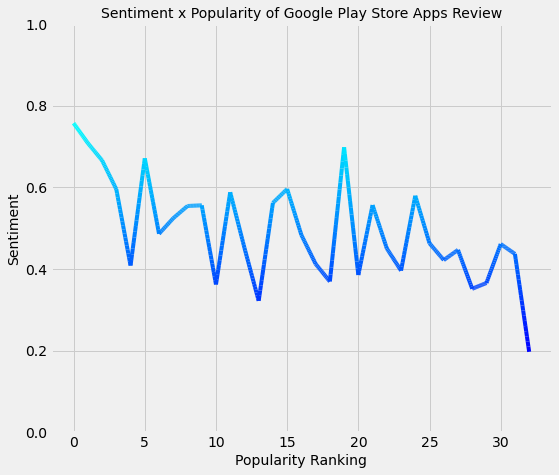

In [59]:
# Create the plot
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 7))

# Create the list of colors for the gradient
colors = list(Color("blue").range_to(Color("cyan"), 100))
sentiments = []
popularity = []
colorMap = []

# Since there are only 32 observations, we need to expand it evenly to have a precise gradient line
for ii in range(0, sentiment_by_installs.Sentiment.count() - 1):
  new_s = np.linspace(sentiment_by_installs.Sentiment[ii], sentiment_by_installs.Sentiment[ii + 1], num=20)
  new_p = np.linspace(sentiment_by_installs.index[ii], sentiment_by_installs.index[ii + 1], num=20)
  for jj in range(0, len(new_s)):
    sentiments.append(new_s[jj])
    popularity.append(new_p[jj])

# Find the min and max values for normalization
max = np.max(sentiments)
min = np.min(sentiments)

# Normalize the y axis
normalized = [(value - min)/(max - min) for value in sentiments]

# Assign a color to each value of y
for value in normalized:
    colorMap.append(colors[np.abs(int((100*value)) - 1)].hex)

# Plot a line between each point with the corresponding color
for kk in range(0, len(sentiments) - 1):
  x = [popularity[kk], popularity[kk+1]]
  y = [sentiments[kk], sentiments[kk+1]]
  ax.plot(x, y, colorMap[kk], linewidth=4, zorder=2)

# Create legends, limits and title
ax.set_ylim(0, 1)
ax.set_title("Sentiment x Popularity of Google Play Store Apps Review", fontsize=14)
ax.set_xlabel("Popularity Ranking", fontsize=14)
ax.set_ylabel("Sentiment", fontsize=14)

plt.show()

### Results

All of our three hypothesis were somehow observed in the analysis section. Since we are only trying to see the macro state of the data to guess things about it, without using any real information test or inference, we can't make any assumption. Still, the work in this project can help to create better hypothesis.



*   **Hypothesis 1**: the histograms point at some link between sentiment and rating but it may be due to similar causalities and not due to correlation between those two variables. The scatter plot created after do not add any new information, keeping our guess from the histograms.
*   **Hypothesis 2**: due to the low number of observations for the paid category, this dataset is not suitable to answer our hypothesis. Analyzing the means, there is no significant difference between them.
*   **Hypothesis 3**: observing the graphic created, there is no clear information to be obtained. There are fewer appearences of higher sentiment values as the popularity rank goes lower, what could help our initial hypothesis. 



### Next

### References